## Skim lit :many-to-one classification *italicized text*
Input_shape=[none,embedding size]

output_shape=[5]

In [13]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [14]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign


dev.txt  test.txt  train.txt


In [15]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [16]:
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [17]:
#Preprocess data
def get_lines(filename):
  with open(filename,"r") as f:
    return f.readlines()


In [18]:
train_lines=get_lines(filenames[1])
train_lines[:10]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

In [19]:
def preprocess_text_lines(filename):
  abstract_samples=[]
  abstract_lines=""
  input_lines=get_lines(filename)
  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_no,abstract_line in enumerate(abstract_line_split):
        line_data={}
        split_sentence=abstract_line.split("\t")
        label=split_sentence[0]
        sentence=split_sentence[1:]
        line_data["target"]=label
        line_data["text"]=str(sentence).lower()
        line_data["line_number"]=abstract_line_no
        line_data["total_lines"]=len(abstract_line_split)
        abstract_samples.append(line_data)
    else:
      abstract_lines+=line

  return abstract_samples

In [20]:
train_samples=preprocess_text_lines(data_dir+"train.txt")
val_samples=preprocess_text_lines(data_dir+"dev.txt")
test_samples=preprocess_text_lines(data_dir+"test.txt")

In [21]:
train_samples[:2]

[{'target': 'OBJECTIVE',
  'text': "['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']",
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': "['a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .']",
  'line_number': 1,
  'total_lines': 12}]

In [22]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)

In [23]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,['to investigate the efficacy of @ weeks of da...,0,12
1,METHODS,['a total of @ patients with primary knee oa w...,1,12
2,METHODS,['outcome measures included pain reduction and...,2,12
3,METHODS,['pain was assessed using the visual analog pa...,3,12
4,METHODS,['secondary outcome measures included the west...,4,12
...,...,...,...,...
180035,RESULTS,['for the absolute change in percent atheroma ...,7,12
180036,RESULTS,"['for pav , a significantly greater percentage...",8,12
180037,RESULTS,['both strategies had acceptable side effect p...,9,12
180038,CONCLUSIONS,"['compared with standard statin monotherapy , ...",10,12


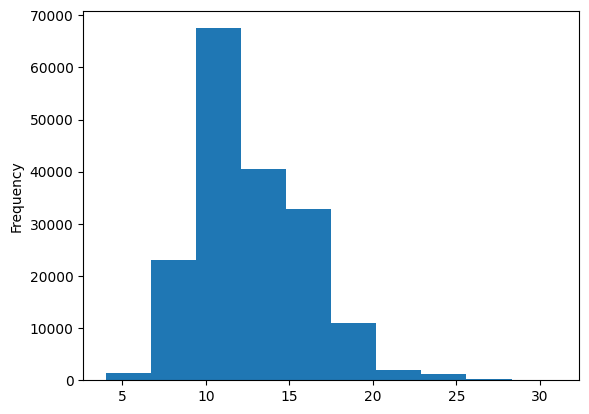

In [24]:
train_df.total_lines.plot.hist();

In [25]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()

In [26]:
train_sentences[:10]

["['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']",
 "['a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .']",
 "['outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .']",
 "['pain was assessed using the visual analog pain scale ( @-@ mm ) .']",
 "['secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']",
 "['serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .'

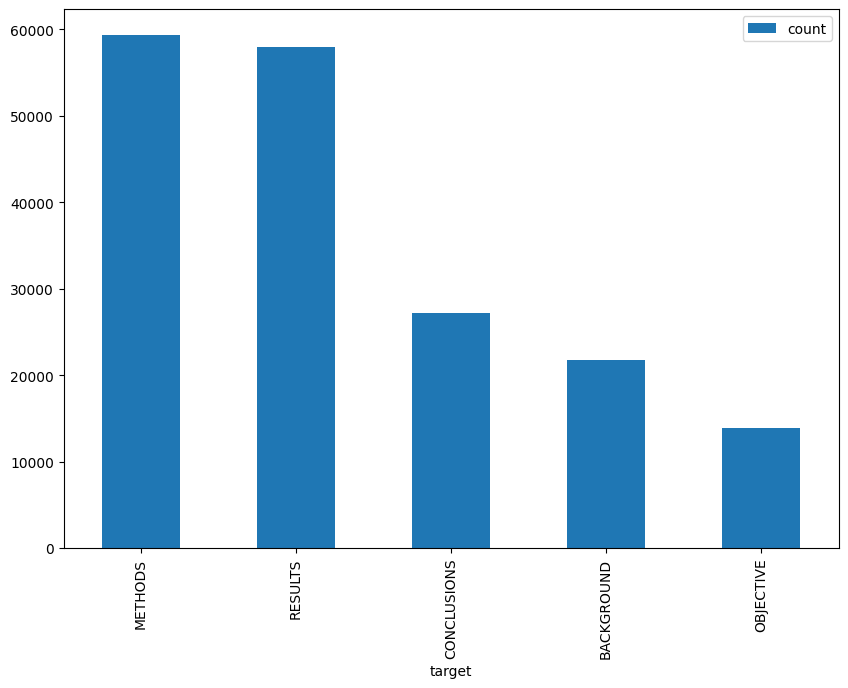

In [27]:
#visualising the no of sentences per label
methods=train_df["target"].value_counts()
methods=methods.transpose()
plot=pd.DataFrame(methods).plot(kind="bar",figsize=(10,7))

#make numeric labels

make one hot encoder

In [28]:
##making numeric labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(1,-1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(1,-1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(1,-1))
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 1., 1., ..., 1., 1., 1.]])

In [29]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(1, 180040), dtype=float64, numpy=array([[1., 1., 1., ..., 1., 1., 1.]])>

method 2 :encoding the labels

In [30]:
##extract labels ("target columns ") and encode into integers
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
train_labels_encoded=label_encode.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=label_encode.fit_transform(val_df["target"].to_numpy())
test_labels_encoded=label_encode.fit_transform(test_df["target"].to_numpy())

In [31]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [32]:
#get class name and no of classes fomr label encoder instance
num_classes=len(label_encode.classes_)
class_names=label_encode.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

#Model1: creating a baseline models

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

baseline_model=Pipeline([("tfidf",TfidfVectorizer()),("clf",MultinomialNB())])
baseline_model.fit(train_sentences,train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [34]:
baseline_model.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [35]:
baseline_preds=baseline_model.predict(val_sentences)

In [36]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-07-13 09:56:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-13 09:56:40 (78.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [37]:
from helper_functions import calculate_results


# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results


{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## model 2 :conv1D token embeddings

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [39]:
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

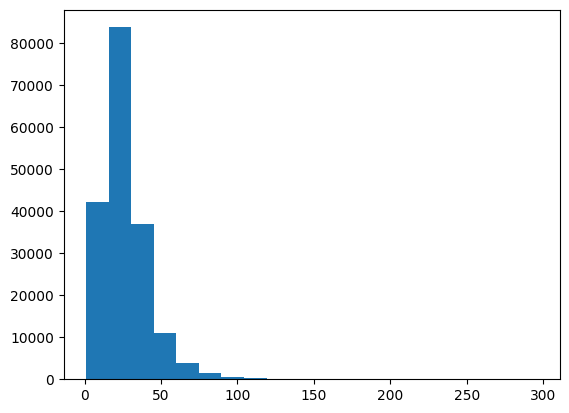

In [40]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20)

In [41]:
#how long of a sentence length
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [42]:
from tensorflow.keras.layers import TextVectorization

MAX_VOCAB_SIZE=68000
text_vectorizer=TextVectorization(max_tokens=MAX_VOCAB_SIZE,output_sequence_length=output_seq_len,pad_to_max_tokens=True)

In [43]:
#adapt to validation data
text_vectorizer.adapt(train_sentences)

In [44]:
import random
target_sentence=random.choice(train_sentences)
print(f"text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized tezt:{text_vectorizer([target_sentence])}")

text:
['in some mcis , self-reporting of symptoms can decrease the time required for history taking , without sacrificing the completeness of triage information .']

Length of text: 24

Vectorized tezt:[[    5   584 37114 16579     4   144   171   318     2    63   482    11
    726  1140   159 24740     2  8119     4  3927   380     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [45]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"least common words in a vocab : {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
least common words in a vocab : ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [46]:
#creating the embeddeing layer
embedding=layers.Embedding(input_dim=len(rct_20k_text_vocab),output_dim=128,mask_zero=True,input_length=output_seq_len)

In [47]:
print(f"Sentence before vectorization: {target_sentence} \n")
print(f"Sentence after vectorization: {text_vectorizer([target_sentence])}")
print(f"Sentence after embedding: {embedding(text_vectorizer([target_sentence]))}")

Sentence before vectorization: ['in some mcis , self-reporting of symptoms can decrease the time required for history taking , without sacrificing the completeness of triage information .'] 

Sentence after vectorization: [[    5   584 37114 16579     4   144   171   318     2    63   482    11
    726  1140   159 24740     2  8119     4  3927   380     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Sentence after embedding: [[[ 0.01790576 -0.02385533  0.00315902 ... -0.04943269 -0.01888148
   -0.04210715]
  [ 0.03944485 -0.03773669 -0.02197578 ...  0.04075341  0.0159036
    0.02942742]
  [-0.00791252 -0.03463509  0.04472264 ... -0.03333651  0.04772377
   -0.04080858]
  ...
  [-0.01106552  0.02519744 -0.04787749 ... -0.04248163  0.02730506
   -0.04855746]
  [-0.01106552  0.02519744 -0.04787749 ... -0.04248163  0.02730506
   -0.

In [48]:
input=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(input)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="same")(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(input,outputs)


In [49]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 5)                 325   

In [50]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [51]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_encoded))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_encoded))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_encoded))

In [52]:
train_dataset=train_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [53]:
history_1=model_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),validation_data=val_dataset,validation_steps=len(val_dataset),epochs=3)

Epoch 1/3
562/562 [==============================] - 81s 143ms/step - loss: 0.9196 - accuracy: 0.6341 - val_loss: 0.7003 - val_accuracy: 0.7332
Epoch 2/3
562/562 [==============================] - 76s 135ms/step - loss: 0.6685 - accuracy: 0.7494 - val_loss: 0.6515 - val_accuracy: 0.7647
Epoch 3/3
562/562 [==============================] - 77s 137ms/step - loss: 0.6290 - accuracy: 0.7681 - val_loss: 0.6092 - val_accuracy: 0.7829


In [54]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 6s 7ms/step - loss: 0.6092 - accuracy: 0.7829


[0.609186589717865, 0.7829339504241943]

In [55]:
model_1_pred_probs=model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 6s 6ms/step


array([[3.8599494e-01, 2.1722116e-01, 9.6618384e-02, 2.6343253e-01,
        3.6733024e-02],
       [4.5197597e-01, 2.6755702e-01, 1.1075149e-02, 2.6343316e-01,
        5.9586167e-03],
       [1.7971738e-01, 1.8504709e-02, 2.5221284e-03, 7.9918748e-01,
        6.8319408e-05],
       ...,
       [2.2320010e-06, 7.9286692e-04, 6.4735307e-04, 1.1027994e-06,
        9.9855644e-01],
       [6.5644354e-02, 4.6578431e-01, 9.4337180e-02, 8.4139593e-02,
        2.9009455e-01],
       [2.1803549e-01, 5.7016802e-01, 4.1821752e-02, 7.9098374e-02,
        9.0876400e-02]], dtype=float32)

In [56]:
model_1_probs=tf.argmax(model_1_pred_probs,axis=1)
model_1_probs

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [57]:
model_1_results=calculate_results(y_true=val_labels_encoded,y_pred=model_1_probs)
model_1_results

{'accuracy': 78.29339335363431,
 'precision': 0.7795573273571087,
 'recall': 0.7829339335363432,
 'f1': 0.7806313595242516}

In [58]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

#Model 2:universal sentence encoder feature extractor model

In [59]:
import tensorflow_hub as hub
use_embedding=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",input_shape=[],trainable=False,dtype="string",name="universal_encoder")


In [60]:
import random
random_sentence=random.choice(train_sentences)
print(f"Random sentence:\n{random_sentence}\n")
use_embedded_sentence=use_embedding([random_sentence])
print(f"random sentence after use embeddings {use_embedded_sentence}")

Random sentence:
['the objective of this study is to evaluate the effect of an intervention designed to increase md adherence on lung function in smokers with no previous respiratory disease .']

random sentence after use embeddings [[ 0.0543167  -0.01919057 -0.04857082 -0.04579536 -0.06579383 -0.07544111
  -0.00956745  0.00822918  0.05055837 -0.00769821  0.08569595  0.00855586
   0.06836709 -0.00236851  0.06472224  0.01055555 -0.08761781  0.0214771
  -0.06953069 -0.04223287 -0.03267832  0.02770303 -0.0010362  -0.03138261
  -0.04164568 -0.04380268  0.02209888  0.00241601 -0.05805278 -0.05023582
   0.03943202  0.08780283 -0.031563   -0.01645856 -0.05442442 -0.03124676
  -0.05875506 -0.04670344 -0.02052773 -0.03778209 -0.05541938  0.07373024
  -0.06788035 -0.0234262  -0.06724395  0.08250255  0.04117193  0.02116825
   0.0346441  -0.0321005  -0.05219087  0.03439442  0.00429364  0.01317332
  -0.06235204  0.04869995  0.01922167  0.0423031   0.0810895  -0.01015532
  -0.0267048   0.04150452  0

In [61]:
inputs=layers.Input(shape=[],dtype=tf.string)
#universal sentence encoder
x=use_embedding(inputs)
x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs)

In [62]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [63]:
history_2=model_2.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),validation_data=val_dataset,validation_steps=len(val_dataset),epochs=3)


Epoch 1/3
562/562 [==============================] - 20s 31ms/step - loss: 0.9554 - accuracy: 0.6395 - val_loss: 0.8124 - val_accuracy: 0.6899
Epoch 2/3
562/562 [==============================] - 18s 32ms/step - loss: 0.7837 - accuracy: 0.6947 - val_loss: 0.7697 - val_accuracy: 0.7038
Epoch 3/3
562/562 [==============================] - 28s 50ms/step - loss: 0.7714 - accuracy: 0.7045 - val_loss: 0.7587 - val_accuracy: 0.7070


In [64]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 12s 13ms/step - loss: 0.7587 - accuracy: 0.7070


[0.75869220495224, 0.7070038318634033]

In [65]:
model_2_preds_probs=model_2.predict(val_dataset)
model_2_preds_probs.shape

945/945 [==============================] - 12s 13ms/step


(30212, 5)

In [66]:
model_2_preds=tf.argmax(model_2_preds_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [67]:
model_2_results = calculate_results(y_true=val_labels_encoded, y_pred=model_2_preds)
model_2_results

{'accuracy': 70.70038395339601,
 'precision': 0.7067414133119241,
 'recall': 0.7070038395339601,
 'f1': 0.7032304048478932}

#Model 3 : conv1d with character embeddings

In [68]:
def split_chars(text):
  return " ".join(list(text))

In [69]:
random_sentence

"['the objective of this study is to evaluate the effect of an intervention designed to increase md adherence on lung function in smokers with no previous respiratory disease .']"

In [70]:
val=split_chars(random_sentence)
val

"[ ' t h e   o b j e c t i v e   o f   t h i s   s t u d y   i s   t o   e v a l u a t e   t h e   e f f e c t   o f   a n   i n t e r v e n t i o n   d e s i g n e d   t o   i n c r e a s e   m d   a d h e r e n c e   o n   l u n g   f u n c t i o n   i n   s m o k e r s   w i t h   n o   p r e v i o u s   r e s p i r a t o r y   d i s e a s e   . ' ]"

In [71]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
train_chars[:3]

["[ ' t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   . ' ]",
 "[ ' a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   . ' ]",
 "[ ' o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o 

In [72]:
#average character length?
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

153.36626305265497

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([   5.        ,  202.85714286,  400.71428571,  598.57142857,
         796.42857143,  994.28571429, 1192.14285714, 1390.        ]),
 <BarContainer object of 7 artists>)

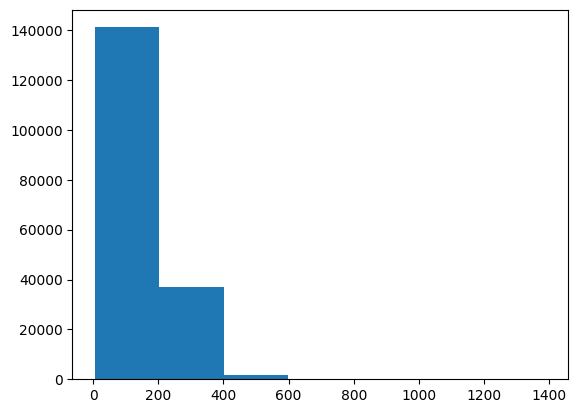

In [73]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)

In [74]:
#95 percent of alphabets
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

294

In [75]:
#get all keyboard characters
import string
alphabet=string.ascii_lowercase+string.digits
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789'

In [76]:
#create char-level token vectorizer instance
NUM_CHAR_TOKENS=len(alphabet)+2 #add 2 for space and OOV token (out of vocab ,"[UNK]")
char_vectorizer =TextVectorization(max_tokens=NUM_CHAR_TOKENS,output_sequence_length=output_seq_char_len)

In [77]:
char_vectorizer.adapt(train_chars)

In [78]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"no of different characters in character vocab {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

no of different characters in character vocab 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [79]:
random_chars=random.choice(train_chars)
print(f"charified text:\n {random_chars}")
print(f"5 most common character  {char_vectorizer(random_chars)[:5]}")
print(f"5 least common character {char_vectorizer(random_chars)[-5:]}")

charified text:
 [ ' s e p t i c   p a t i e n t s / c @ b l / @   m i c e   a n d   h u m a n   e n d o t h e l i a l   c e l l s   . ' ]
5 most common character  [ 9  2 14  3  4]
5 least common character [0 0 0 0 0]


In [80]:
char_embed=layers.Embedding(input_dim=len(char_vocab),output_dim=25,mask_zero=True,input_length=output_seq_char_len,name="char_embed")


In [81]:
print(f"charified text :\n {random_chars}")
char_embed_example=char_embed(char_vectorizer(random_chars))
print(f"embedded chars  after vectorization and embedding {char_embed_example}")
print(f"character embedding shape: {char_embed_example.shape}")

charified text :
 [ ' s e p t i c   p a t i e n t s / c @ b l / @   m i c e   a n d   h u m a n   e n d o t h e l i a l   c e l l s   . ' ]
embedded chars  after vectorization and embedding [[ 0.04511495 -0.00441055 -0.01044666 ...  0.01116319  0.02927123
  -0.04383997]
 [-0.0211515  -0.01053679 -0.01732565 ... -0.01220632  0.00249885
  -0.02011087]
 [-0.01967251 -0.04907177 -0.01802765 ...  0.02189641  0.0268486
  -0.04047216]
 ...
 [ 0.01528959  0.03928104 -0.03024602 ...  0.04967329 -0.03128447
   0.01096634]
 [ 0.01528959  0.03928104 -0.03024602 ...  0.04967329 -0.03128447
   0.01096634]
 [ 0.01528959  0.03928104 -0.03024602 ...  0.04967329 -0.03128447
   0.01096634]]
character embedding shape: (294, 25)


In [82]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(inputs)
x=char_embed(x)
x=tf.keras.layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="same")(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs,outputs)

In [83]:
train_chars_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_encoded))
val_chars_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_encoded))
test_chars_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_encoded))

In [84]:
train_chars_dataset=train_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset=test_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset=val_chars_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [85]:
model_3.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [192]:
history_3=model_3.fit(train_chars_dataset,steps_per_epoch=int(0.1*len(train_chars_dataset)),validation_data=val_chars_dataset,validation_steps=len(val_chars_dataset),epochs=3)

Epoch 1/3
562/562 [==============================] - 19s 33ms/step - loss: 1.2125 - accuracy: 0.5068 - val_loss: 1.0833 - val_accuracy: 0.5615
Epoch 2/3
562/562 [==============================] - 19s 33ms/step - loss: 1.0474 - accuracy: 0.5771 - val_loss: 1.0037 - val_accuracy: 0.5976
Epoch 3/3
562/562 [==============================] - 20s 36ms/step - loss: 0.9745 - accuracy: 0.6095 - val_loss: 0.9291 - val_accuracy: 0.6330


In [193]:
model_3_preds_probs=model_3.predict(val_chars)
model_3_preds_probs

945/945 [==============================] - 7s 7ms/step


array([[0.18153568, 0.35869527, 0.1372679 , 0.29124093, 0.03126022],
       [0.13859136, 0.669745  , 0.02134773, 0.09135426, 0.07896162],
       [0.25719485, 0.38453466, 0.08886195, 0.23872584, 0.03068258],
       ...,
       [0.02191385, 0.07954749, 0.31805202, 0.08409985, 0.49638683],
       [0.05681311, 0.15867637, 0.35193905, 0.16971818, 0.26285335],
       [0.31010312, 0.50102943, 0.07729727, 0.07764629, 0.03392391]],
      dtype=float32)

In [194]:
model_3_preds=tf.argmax(model_3_preds_probs,axis=1)

In [195]:
model_3_results=calculate_results(y_true=val_labels_encoded,y_pred=model_3_preds)
model_3_results

{'accuracy': 63.30266119422746,
 'precision': 0.6361664681718863,
 'recall': 0.6330266119422746,
 'f1': 0.6206117844043715}

#Model 4 : multi modal model

1.create a token-level embedding model \n
2.create  a character-level model \n
3.combine  1 and 2

In [196]:
#setting up token inputs
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_inputs")
token_embeddings=use_embedding(token_inputs)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,outputs=token_output)

#setting up character inputs/model
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_inputs")
x=char_vectorizer(char_inputs)
x=char_embed(x)
char_bi_lstm_output=layers.Bidirectional(layers.LSTM(24))(x)
char_model=tf.keras.Model(char_inputs,char_bi_lstm_output)
#concatenate token and char
token_char_concat=layers.Concatenate(name="concatenate_layer")([token_output,char_bi_lstm_output])

#create output layers -adding dropout ,discussed
combined_dropout=layers.Dropout(0.5,name="first_dropout")(token_char_concat)
combined_dense=layers.Dense(128,activation="relu")(combined_dropout)
final_droput=layers.Dropout(0.5,name="final_dropout")(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")

model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],outputs=output_layer(final_droput),name="model_4_token_char_embeddings")

In [197]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = use_embedding(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_conv1d_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")


In [198]:
model_conv1d_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 294)                  0         ['char_input[0][0]']          
 Vectorization)                                                                                   
                                                                                                  
 universal_encoder (KerasLa  (None, 512)                  2567978 

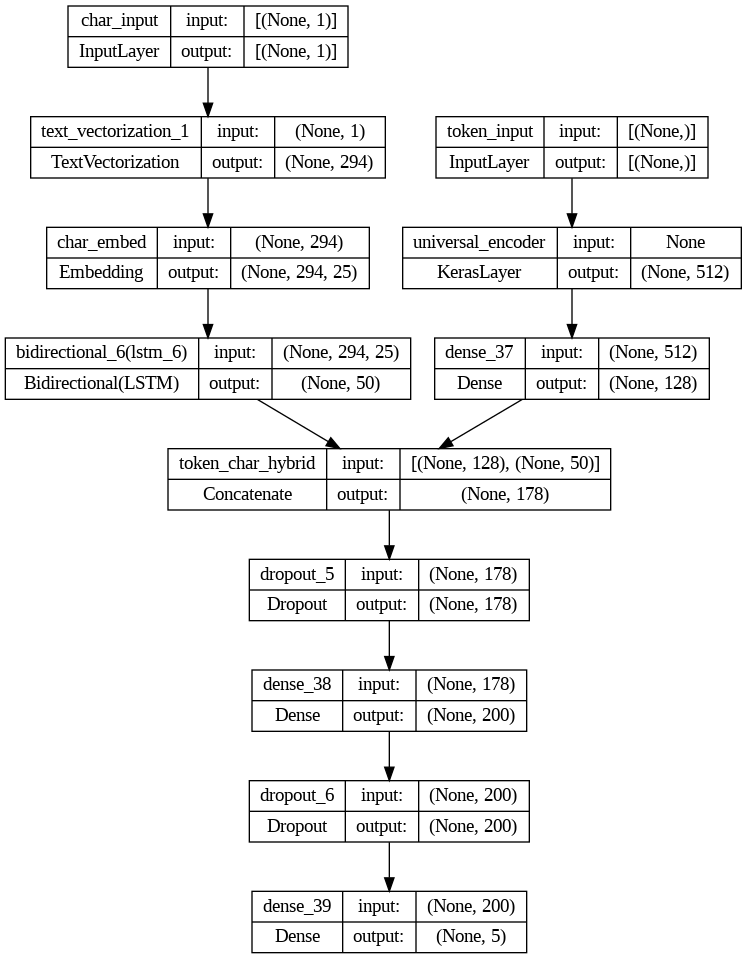

In [199]:
#plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_conv1d_4,show_shapes=True)

In [200]:
model_conv1d_4.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [201]:
num_classes

5

In [ ]:
train_labels_one_hot.shape

In [202]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_encoded) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_encoded)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_char_token_labels=tf.data.Dataset.from_tensor_slices((test_labels_encoded))
test_char_token_dataset=tf.data.Dataset.zip((test_char_token_data,test_char_token_labels))
test_char_token_dataset=test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [203]:
model_4_history = model_conv1d_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))


Epoch 1/3
562/562 [==============================] - 263s 344ms/step - loss: 0.9702 - accuracy: 0.6160 - val_loss: 0.7742 - val_accuracy: 0.6991
Epoch 2/3
562/562 [==============================] - 189s 337ms/step - loss: 0.7876 - accuracy: 0.6943 - val_loss: 0.7108 - val_accuracy: 0.7267
Epoch 3/3
562/562 [==============================] - 190s 339ms/step - loss: 0.7629 - accuracy: 0.7056 - val_loss: 0.6950 - val_accuracy: 0.7384


In [204]:
model_4_preds_probs=model_conv1d_4.predict(val_char_token_dataset)
model_4_preds_probs

945/945 [==============================] - 73s 74ms/step


array([[4.5427030e-01, 3.1602976e-01, 2.8079054e-03, 2.2295597e-01,
        3.9359694e-03],
       [3.6235449e-01, 4.2679682e-01, 3.5499777e-03, 2.0554216e-01,
        1.7565656e-03],
       [2.7333406e-01, 6.8631954e-02, 3.1631857e-02, 6.1058438e-01,
        1.5817722e-02],
       ...,
       [4.9547531e-04, 6.6601681e-03, 4.5632225e-02, 1.7793235e-04,
        9.4703418e-01],
       [7.3407693e-03, 5.7753805e-02, 2.3922543e-01, 3.5348795e-03,
        6.9214505e-01],
       [2.8095362e-01, 3.8509136e-01, 2.4938375e-01, 4.0522136e-02,
        4.4049110e-02]], dtype=float32)

In [205]:
model_4_preds=tf.argmax(model_4_preds_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [206]:
model_4_results=calculate_results(y_true=val_labels_encoded,y_pred=model_4_preds)
model_4_results

{'accuracy': 73.26889977492387,
 'precision': 0.7333102924253668,
 'recall': 0.7326889977492387,
 'f1': 0.7319197120188324}

#Model 5:pretrained embedding +positional embeddings

In [87]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,['to investigate the efficacy of @ weeks of da...,0,12
1,METHODS,['a total of @ patients with primary knee oa w...,1,12
2,METHODS,['outcome measures included pain reduction and...,2,12
3,METHODS,['pain was assessed using the visual analog pa...,3,12
4,METHODS,['secondary outcome measures included the west...,4,12
...,...,...,...,...
180035,RESULTS,['for the absolute change in percent atheroma ...,7,12
180036,RESULTS,"['for pav , a significantly greater percentage...",8,12
180037,RESULTS,['both strategies had acceptable side effect p...,9,12
180038,CONCLUSIONS,"['compared with standard statin monotherapy , ...",10,12


In [88]:
##label sequence optimization layer
#ANY ENGINEER FEATURE SHOULD BE AVAILABLE AT RUNTIME

#input =seq of probability vectors from label predictionlayer
#outputs= seq of labels assigned to a token
df=pd.DataFrame(train_df["target"],train_df["line_number"])
df_2=df.groupby("target").get_group("OBJECTIVE")
print(df_2)

                target
line_number           
0            OBJECTIVE
0            OBJECTIVE
0            OBJECTIVE
14           OBJECTIVE
0            OBJECTIVE
...                ...
0            OBJECTIVE
0            OBJECTIVE
0            OBJECTIVE
0            OBJECTIVE
0            OBJECTIVE

[19696 rows x 1 columns]


In [89]:
#ANY ENGINEER FEATURE SHOULD BE AVAILABLE AT RUNTIME
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

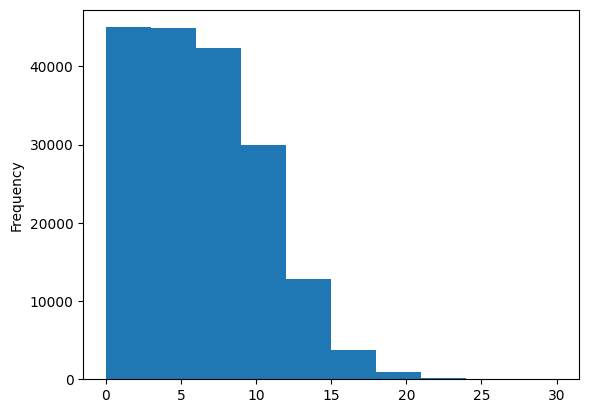

In [90]:
#check distribution
train_df.line_number.plot(kind="hist");

In [91]:
#one hot encoded
train_line_numbers_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=15)
train_line_numbers_one_hot[:10]


<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [92]:
line_no_percentile=np.percentile(train_df["line_number"],95)
print(line_no_percentile)


13.0


In [93]:
train_df["total_lines"].value_counts()

total_lines
12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: count, dtype: int64

19.0


<Axes: ylabel='Frequency'>

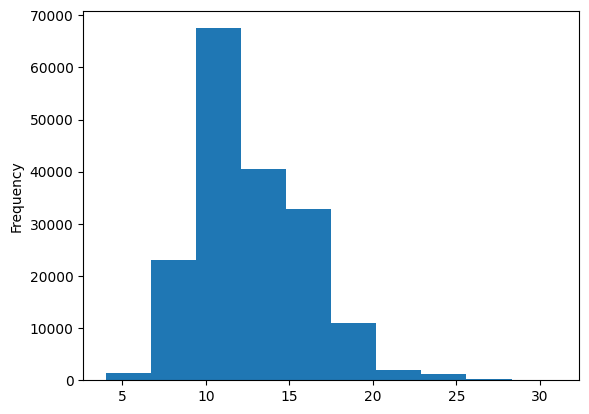

In [94]:
no=np.percentile(train_df["total_lines"],95)
print(no)
train_df.total_lines.plot(kind="hist")

In [95]:
total_line_percentile=np.percentile(train_df["total_lines"],97)
total_line_percentile

20.0

In [96]:
train_total_lines=tf.one_hot(train_df["total_lines"].to_numpy(),depth=total_line_percentile)
val_total_lines=tf.one_hot(val_df["total_lines"].to_numpy(),depth=total_line_percentile)
test_total_lines=tf.one_hot(test_df["total_lines"].to_numpy(),depth=total_line_percentile)


In [97]:
train_line_numbers_one_hot[0].shape


TensorShape([15])

In [98]:
train_total_lines[0].shape

TensorShape([20])

In [136]:
###Building a tribrid model
token_input=layers.Input(shape=(),dtype=tf.string,name="token_input")
token_embeddings=use_embedding(token_input)
token_output=layers.Dense(128,activation="softmax")(token_embeddings)
token_model=tf.keras.Model(inputs=token_input,outputs=token_output)

#char model
char_input=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors=char_vectorizer(char_input)
char_embeddings=char_embed(char_vectors)
#bi directional lstm
char_output=layers.Bidirectional(layers.LSTM(32,activation="softmax"))(char_embeddings)
char_model=tf.keras.Model(inputs=char_input,outputs=char_output)

#positional embedding
line_number_input=layers.Input(shape=(15,),dtype=tf.int32,name="line_number_input")
#line_number_embeddings=layers.Embedding(input_dim=15,output_dim=128)(line_number_input)
line_number_output=tf.keras.layers.Dense(32,activation="relu")(line_number_input)
line_number_model=tf.keras.Model(inputs=line_number_input,outputs=line_number_output)

#total_lines
total_lines_input=layers.Input(shape=train_total_lines[0].shape,dtype=tf.int32,name="total_lines_input")
total_embeddings=layers.Dense(32,activation="relu")(total_lines_input)
total_line_model=tf.keras.Model(inputs=total_lines_input,outputs=total_embeddings)

#combine token and char embeddings
combined_embeddings=layers.Concatenate(name="concatenate",axis=1)([token_model.output,char_model.output])

z=layers.Dense(256,activation="relu")(combined_embeddings)
z=layers.Dropout(0.5)(z)
output_layer=layers.Dense(num_classes,activation="softmax")(z)

#TRIBRID EMBEDDINGS
tribrid_embeddings=layers.Concatenate(name="tribrid_embeddings")([line_number_model.output,total_line_model.output,z])
#create output layer
output_layer=layers.Dense(5,activation="softmax")(tribrid_embeddings)

In [137]:
num_classes

5

In [144]:
model_5=tf.keras.Model(inputs=[line_number_model.input,total_line_model.input,token_model.input,char_model.input],outputs=output_layer)

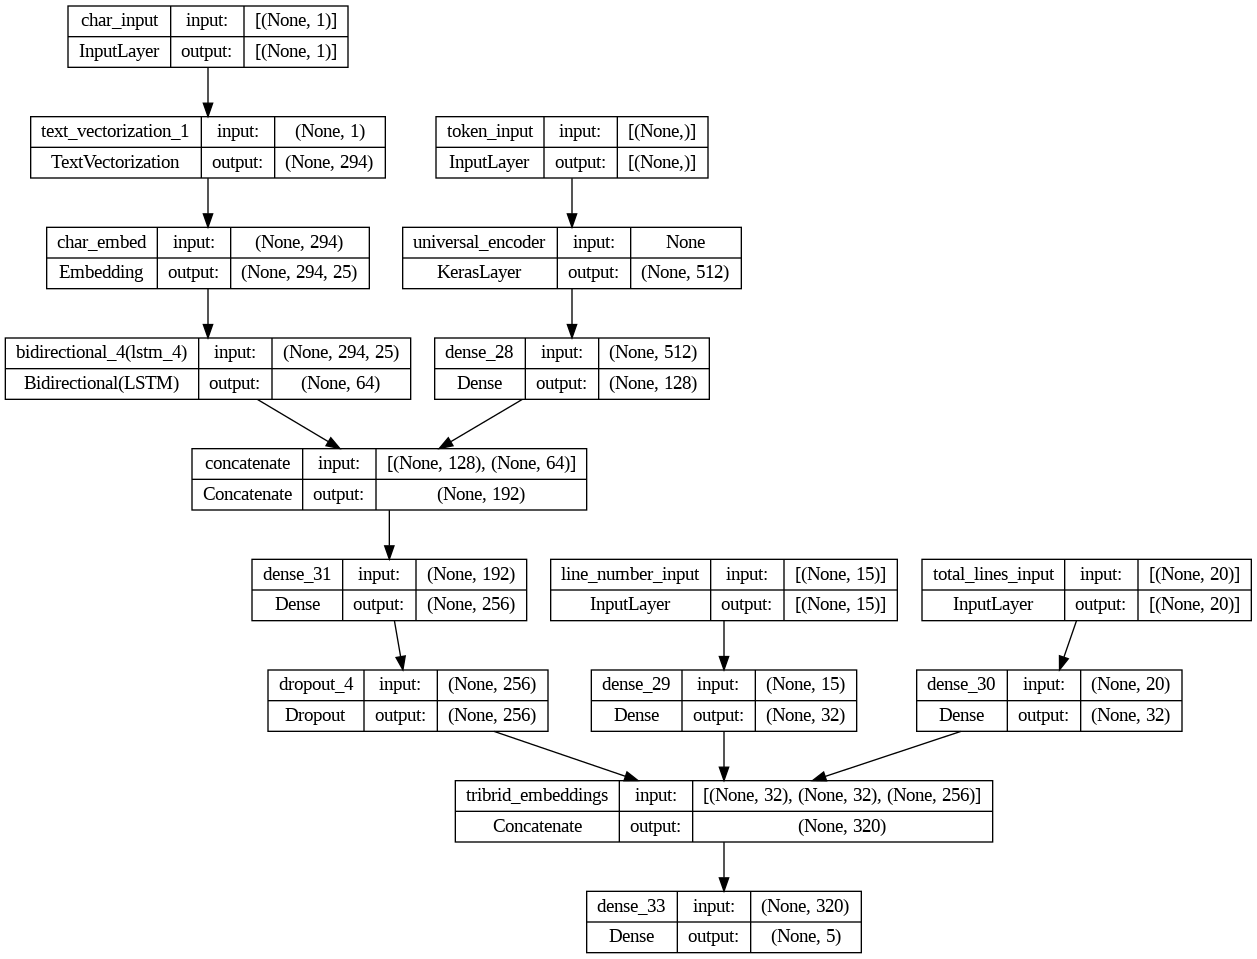

In [139]:
from keras.utils import plot_model
plot_model(model_5,show_shapes=True)

What is label smoothing ?

if our model gets stuck on  a class it may get stuck on that class and not consider other classes

In [148]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [160]:
train_labels_encoded.shape

(180040,)

In [178]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32) #prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32) #prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_BatchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>)

Creating tribrid data

In [208]:
model_5_history=model_5.fit(train_pos_char_token_dataset,steps_per_epoch=int(0.1*len(train_pos_char_token_dataset)),validation_data=val_pos_char_token_dataset ,validation_steps=int(0.1*len(val_pos_char_token_dataset )),epochs=3)

Epoch 1/3
562/562 [==============================] - 219s 389ms/step - loss: 0.9891 - accuracy: 0.7941 - val_loss: 0.9794 - val_accuracy: 0.7992
Epoch 2/3
562/562 [==============================] - 214s 380ms/step - loss: 0.9785 - accuracy: 0.8010 - val_loss: 0.9630 - val_accuracy: 0.8148
Epoch 3/3
562/562 [==============================] - 218s 387ms/step - loss: 0.9723 - accuracy: 0.8038 - val_loss: 0.9623 - val_accuracy: 0.8135


In [186]:
model_5_pred_probs=model_5.predict(val_pos_char_token_dataset,verbose=1)
model_5_pred_probs

945/945 [==============================] - 92s 97ms/step


array([[0.4308234 , 0.07971381, 0.01410044, 0.4572901 , 0.01807227],
       [0.49046576, 0.10813565, 0.07579283, 0.30890352, 0.01670219],
       [0.3633013 , 0.15420447, 0.15147674, 0.2854011 , 0.04561639],
       ...,
       [0.04763025, 0.11963461, 0.09518912, 0.02964095, 0.7079051 ],
       [0.07618686, 0.18644948, 0.20764811, 0.03318834, 0.49652728],
       [0.19949478, 0.36535662, 0.25443578, 0.0557222 , 0.12499066]],
      dtype=float32)

In [188]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)

In [190]:
model_5_results=calculate_results(y_true=val_labels_encoded,y_pred=model_5_preds)
model_5_results

{'accuracy': 76.75095988349,
 'precision': 0.7678757915897407,
 'recall': 0.7675095988349,
 'f1': 0.7612497417068613}

In [216]:
all_model_results=pd.DataFrame({"base_line":baseline_results,"model_1":model_1_results,"model_2":model_2_results,"model_3":model_3_results,"model_4":model_4_results,"model_5":model_5_results})
all_model_results=all_model_results.transpose()
all_model_results["accuracy"]=all_model_results["accuracy"]/100


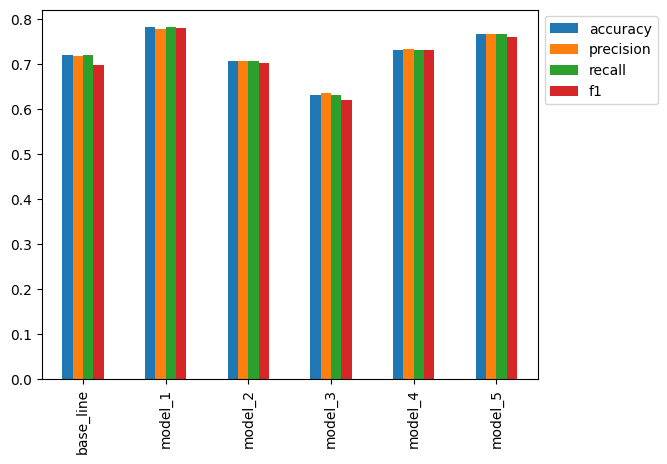

In [218]:
all_model_results.plot(kind="bar",fig=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

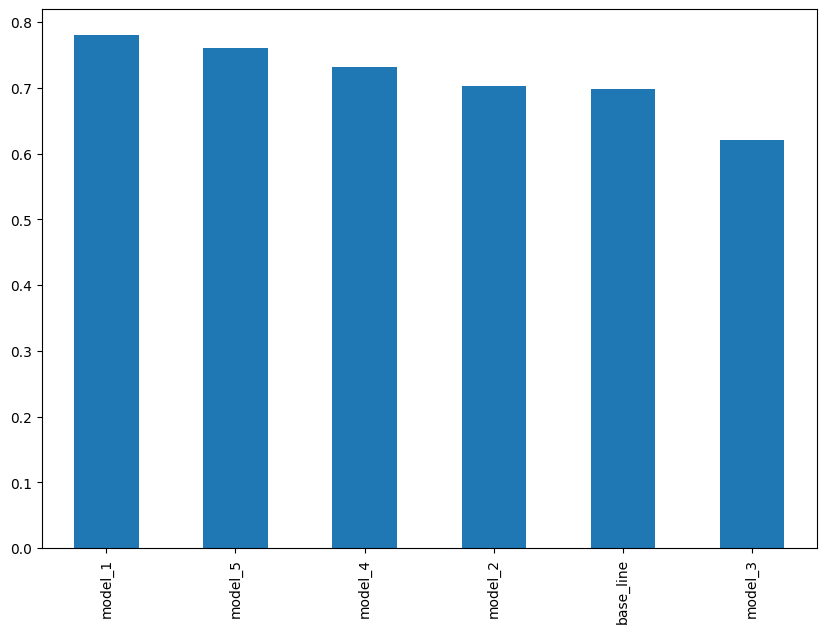

In [219]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [253]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines,
                                                               test_sentences,
                                                               test_chars))
print(f"{len(test_pos_char_token_data)}")
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_encoded)
print(f"{len(test_labels_one_hot)}")

print(f"{len(test_pos_char_token_labels)}")
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32)#.prefetch(tf.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

30135
1
30135


<_BatchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [254]:
len(test_pos_char_token_dataset)

942

In [255]:
test_pred_probs=model_5.predict(test_pos_char_token_dataset,verbose=1)
test_preds=tf.argmax(test_pred_probs,axis=1)
test_preds[:10]

942/942 [==============================] - 82s 86ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 4, 3])>

In [257]:
results=calculate_results(y_true=test_labels_encoded,y_pred=test_preds)
results

{'accuracy': 80.70350091256014,
 'precision': 0.8079714191058234,
 'recall': 0.8070350091256014,
 'f1': 0.8059008579297962}